# Problem Statement
Public housing resale prices in Singapore serve as a critical indicator of housing affordability and social mobility. Understanding what drives these prices provides insight into the effectiveness of urban planning policies and the economic well-being of citizens. This dataset on HDB resale transactions contains key variables such as town, flat type, floor area, storey range, lease commencement year, remaining lease, and resale price.

What factors most significantly influence the resale price of HDB flats in Singapore, and how accurately can these factors be used to predict current (in the dataset) resale prices?

1. Analyze the relationship between structural attributes (e.g., floor area, flat type) and resale price.


2. Investigate the effect of temporal and locational factors (e.g., month, town) on price variation.


3. Develop a predictive model (e.g., multiple linear regression or random forest) to estimate resale prices.


4. Identify key determinants that policymakers can target to maintain housing affordability.





# I. Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn import tree

# II. Load Data

In [ ]:
# Load dataset
df = pd.read_csv('/content/HDB_Resale_Prices.csv')

# Quick look at the dataset
df.head(10)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0
5,2017-01,ANG MO KIO,3 ROOM,150,ANG MO KIO AVE 5,01 TO 03,68.0,New Generation,1981,63 years,275000.0
6,2017-01,ANG MO KIO,3 ROOM,447,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1979,61 years 06 months,280000.0
7,2017-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,04 TO 06,67.0,New Generation,1976,58 years 04 months,285000.0
8,2017-01,ANG MO KIO,3 ROOM,447,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1979,61 years 06 months,285000.0
9,2017-01,ANG MO KIO,3 ROOM,571,ANG MO KIO AVE 3,01 TO 03,67.0,New Generation,1979,61 years 04 months,285000.0


# III. EDA

In [ ]:
# Shape of the data
df.shape

(194170, 11)

In [ ]:
# Column names
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='object')

In [ ]:
# Data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194170 entries, 0 to 194169
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                194170 non-null  object 
 1   town                 194170 non-null  object 
 2   flat_type            194170 non-null  object 
 3   block                194170 non-null  object 
 4   street_name          194170 non-null  object 
 5   storey_range         194170 non-null  object 
 6   floor_area_sqm       194170 non-null  float64
 7   flat_model           194170 non-null  object 
 8   lease_commence_date  194170 non-null  int64  
 9   remaining_lease      194170 non-null  object 
 10  resale_price         194170 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 16.3+ MB


In [ ]:
# Checking missing values per column
df.isna().sum()

# There is no missing values

,0
month,0
town,0
flat_type,0
block,0
street_name,0
storey_range,0
floor_area_sqm,0
flat_model,0
lease_commence_date,0
remaining_lease,0


In [ ]:
df[['flat_type', 'storey_range', 'floor_area_sqm', 'flat_model']]

,flat_type,storey_range,floor_area_sqm,flat_model
0,2 ROOM,10 TO 12,44.0,Improved
1,3 ROOM,01 TO 03,67.0,New Generation
2,3 ROOM,01 TO 03,67.0,New Generation
3,3 ROOM,04 TO 06,68.0,New Generation
4,3 ROOM,01 TO 03,67.0,New Generation
...,...,...,...,...
194165,5 ROOM,07 TO 09,135.0,Model A
194166,5 ROOM,07 TO 09,112.0,Improved
194167,5 ROOM,10 TO 12,113.0,Improved
194168,EXECUTIVE,04 TO 06,148.0,Maisonette


In [ ]:
df['flat_type'].unique()

array(['2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', '1 ROOM',
       'MULTI-GENERATION'], dtype=object)

In [ ]:
df['storey_range'].unique()

array(['10 TO 12', '01 TO 03', '04 TO 06', '07 TO 09', '13 TO 15',
       '19 TO 21', '22 TO 24', '16 TO 18', '34 TO 36', '28 TO 30',
       '37 TO 39', '49 TO 51', '25 TO 27', '40 TO 42', '31 TO 33',
       '46 TO 48', '43 TO 45'], dtype=object)

In [ ]:
df['floor_area_sqm'].unique()

array([ 44. ,  67. ,  68. ,  73. ,  74. ,  82. ,  81. ,  92. ,  91. ,
        94. ,  98. ,  97. ,  99. ,  90. , 117. , 119. , 118. , 112. ,
       121. , 147. ,  45. ,  59. ,  63. ,  70. ,  60. ,  65. ,  75. ,
        66. ,  84. ,  93. , 104. , 105. , 120. , 130. , 132. , 115. ,
       122. , 137. , 139. , 143. , 146. , 145. , 141. ,  64. ,  83. ,
       108. ,  95. , 123. ,  69. , 103. , 102. , 100. , 107. ,  86. ,
       101. , 150. , 155. , 144. ,  34. ,  51. ,  54. ,  58. ,  76. ,
        88. ,  77. , 106. ,  85. ,  89. , 134. , 110. , 111. , 151. ,
        55. , 113. , 126. , 124. , 131. , 142. ,  42. ,  46. ,  56. ,
        61. ,  57. ,  72. , 109. ,  47. ,  96. , 116. , 128. , 140. ,
       148. , 156. , 157. ,  71. ,  52. ,  79. , 129. , 133. , 125. ,
        48. ,  62. , 114. ,  87. , 127. , 161. , 165. ,  50. , 153. ,
        43. , 138. , 164. , 163. , 136. , 149. ,  80. , 154. , 152. ,
        37. ,  78. , 135. , 170. , 192. , 182. ,  31. ,  49. ,  53. ,
        60.3, 176. ,

In [ ]:
df['flat_model'].unique()

array(['Improved', 'New Generation', 'DBSS', 'Standard', 'Apartment',
       'Simplified', 'Model A', 'Premium Apartment', 'Adjoined flat',
       'Model A-Maisonette', 'Maisonette', 'Type S1', 'Type S2',
       'Model A2', 'Terrace', 'Improved-Maisonette', 'Premium Maisonette',
       'Multi Generation', 'Premium Apartment Loft', '2-room', '3Gen'],
      dtype=object)

In [ ]:
df['area_bin'] = pd.cut(df['floor_area_sqm'], bins=[0, 50, 80, 110, 150],
                        labels=['Small', 'Medium', 'Large', 'XL'])

df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,area_bin
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,Small
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,Medium
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,Medium
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,Medium
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...
194165,2024-11,YISHUN,5 ROOM,235,YISHUN ST 21,07 TO 09,135.0,Model A,1985,59 years 10 months,686000.0,XL
194166,2024-11,YISHUN,5 ROOM,335C,YISHUN ST 31,07 TO 09,112.0,Improved,2015,90 years 01 month,700000.0,XL
194167,2024-11,YISHUN,5 ROOM,511B,YISHUN ST 51,10 TO 12,113.0,Improved,2017,91 years 10 months,720000.0,XL
194168,2024-11,YISHUN,EXECUTIVE,405,YISHUN AVE 6,04 TO 06,148.0,Maisonette,1988,62 years 10 months,855500.0,XL


floor_area_sqm vs resale_price

<Axes: xlabel='floor_area_sqm', ylabel='resale_price'>

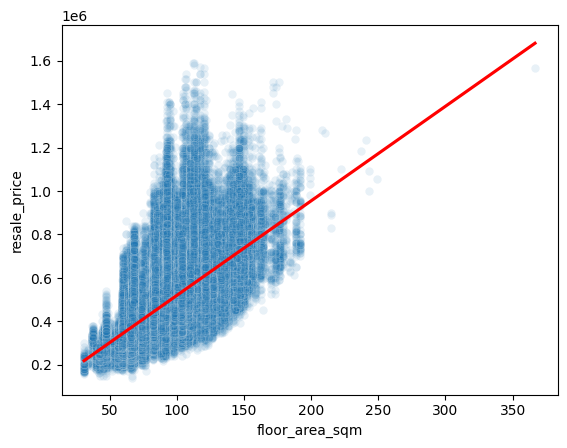

In [ ]:
# The trend line remains the same (red, no scatter)
sns.regplot(x='floor_area_sqm', y='resale_price', data=df, scatter=False, color='red')

# The scatterplot is now transparent (alpha=0.1)
sns.scatterplot(x='floor_area_sqm', y='resale_price', data=df, alpha=0.1)

<Axes: xlabel='floor_area_sqm', ylabel='resale_price'>

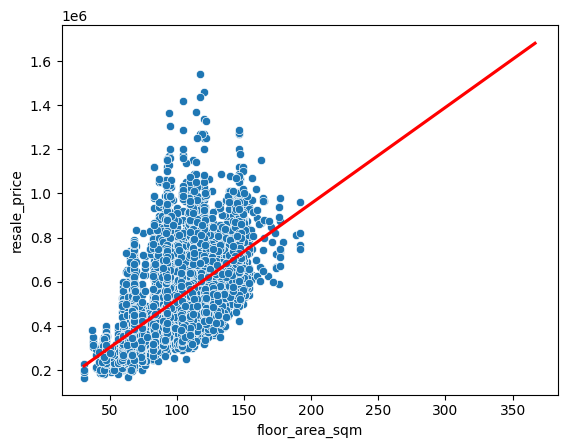

In [ ]:
# Create a sample dataframe (e.g., 5% of the original data)
df_sample = df.sample(frac=0.05, random_state=1)

# Plot the sample points
sns.scatterplot(x='floor_area_sqm', y='resale_price', data=df_sample)

# Plot the trend line (calculated on the *full* dataset for accuracy)
sns.regplot(x='floor_area_sqm', y='resale_price', data=df, scatter=False, color='red')

In [ ]:
sns.scatterplot(x='floor_area_sqm', y='resale_price', data=df)
sns.regplot(x='floor_area_sqm', y='resale_price', data=df, scatter=False, color='red')
plt.xlabel('Floor Area (sqm)')
plt.ylabel('Resale Price')
plt.title('Floor Area vs. Resale Price')
plt.show()

# The scatterplot shows a strong positive relationship between floor are (sqm) and resale price.
# As floor area increases, resale price tend to rise.
# Although there is some variability due to location, flat type, and flat model, the overall trend is upward.

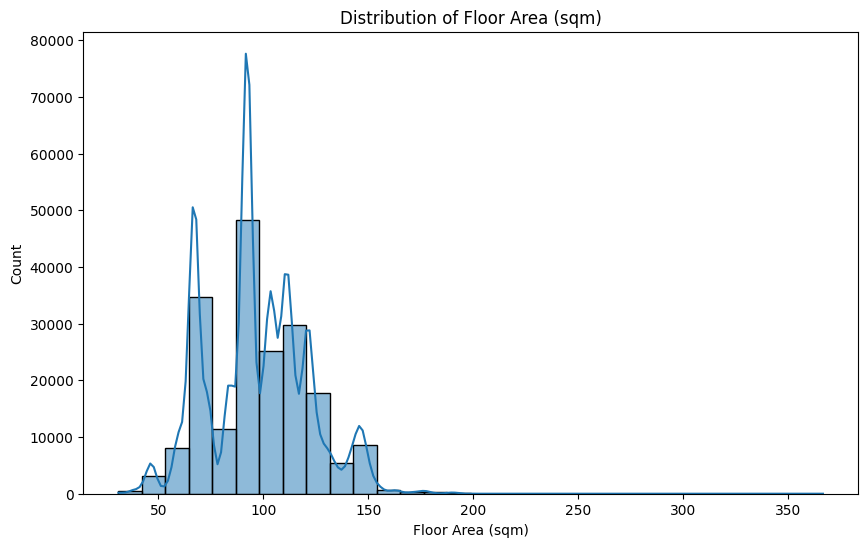

In [ ]:
# Distribution of Floor Area (Count)

plt.figure(figsize=(10, 6))
sns.histplot(df['floor_area_sqm'], kde=True, bins=30)
plt.title('Distribution of Floor Area (sqm)')
plt.xlabel('Floor Area (sqm)')
plt.ylabel('Count')
plt.show()

categorical vs numerical analysis

flat_type, flat_model, storey_range vs resale price

<Axes: xlabel='resale_price', ylabel='flat_type'>

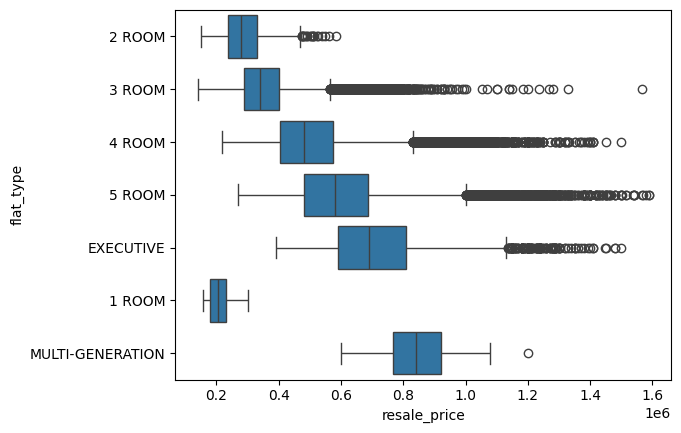

In [ ]:
sns.boxplot(data=df, y='flat_type', x='resale_price')

<Axes: xlabel='resale_price', ylabel='flat_model'>

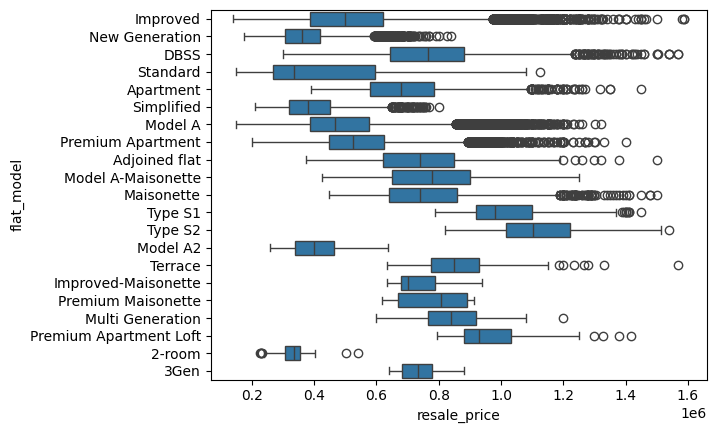

In [ ]:
sns.boxplot(data=df, y='flat_model', x='resale_price')

<Axes: xlabel='resale_price', ylabel='storey_range'>

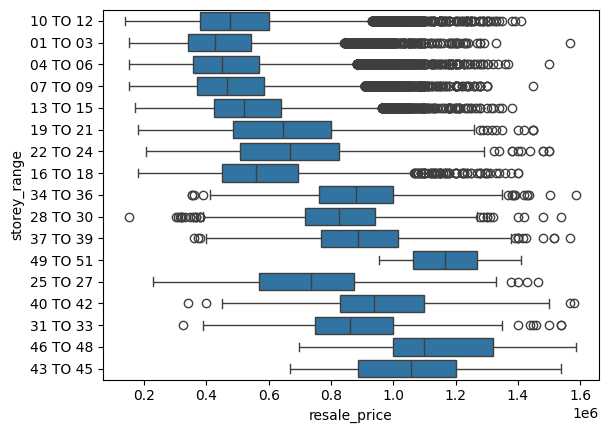

In [ ]:
sns.boxplot(data=df, x='resale_price', y='storey_range')

In [ ]:
# Grouped mean price
df.groupby('flat_type')['resale_price'].mean().sort_values(ascending=False)

,resale_price
flat_type,
MULTI-GENERATION,842086.750000
EXECUTIVE,709383.988674
5 ROOM,602847.920691
4 ROOM,507521.109569
3 ROOM,357316.574189
2 ROOM,283387.577803
1 ROOM,206461.567568


In [ ]:
df.groupby('flat_model')['resale_price'].mean().sort_values(ascending=False)


,resale_price
flat_model,
Type S2,1.132791e+06
Type S1,1.023755e+06
Premium Apartment Loft,9.755317e+05
Terrace,8.796804e+05
Multi Generation,8.420868e+05
Premium Maisonette,7.795000e+05
DBSS,7.770498e+05
Model A-Maisonette,7.737783e+05
Maisonette,7.575412e+05


In [ ]:
df.groupby('storey_range')['resale_price'].mean().sort_values(ascending=False)

,resale_price
storey_range,
49 TO 51,1.174989e+06
46 TO 48,1.131352e+06
43 TO 45,1.047735e+06
40 TO 42,9.616486e+05
37 TO 39,8.934054e+05
34 TO 36,8.752995e+05
31 TO 33,8.652377e+05
28 TO 30,8.168556e+05
25 TO 27,7.278432e+05


# IV. Preprocessing

# V. Model Training

# VI. Evaluation

# VII. Prediction